In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

from init import *


Getting English data
Getting French data
Getting emotion words and bird names


In [2]:
# precompute knn measures
k = 100
k2 = 25
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)
measures_emotion_fra = nn_measure_over_words(words_fr, pos, pos_data_fr, data_fr, t1, t2, k)

measures_emotion_eng_bounded = nn_measure_over_words_filtered(words_eng, pos, pos_data, data, t1, t2, k2)
measures_emotion_fra_bounded = nn_measure_over_words_filtered(words_fr, pos, pos_data_fr, data_fr, t1, t2, k2)

rosch_changes = nn_measure_over_words(words_rosch, pos, pos_data, data, -3, t2, k)


English estimated prototypicality r=0.428, p=0.000, n=123
French estimated prototypicality r=0.438, p=0.000, n=112


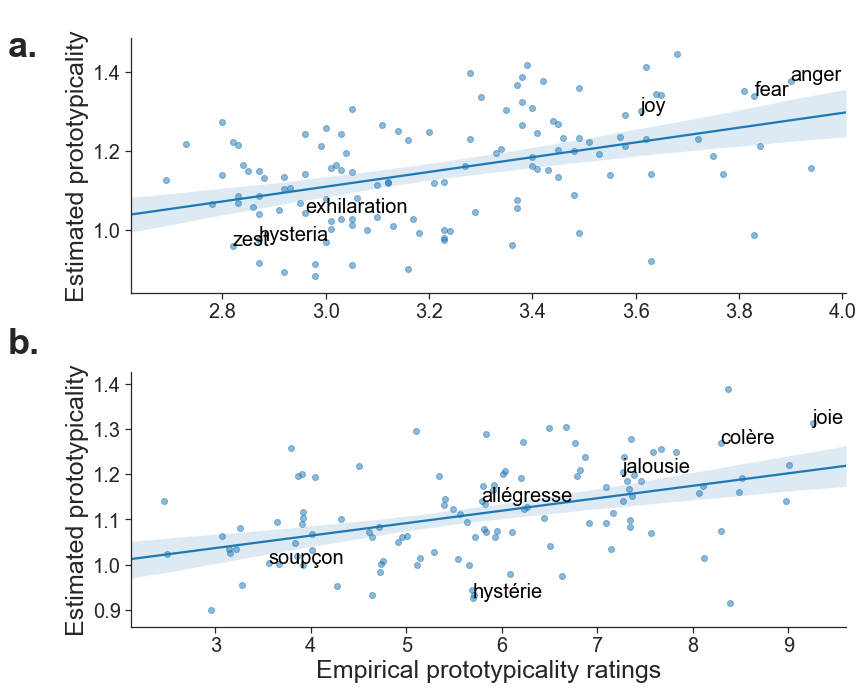

In [3]:
# embedding prototypicality
sns.set_style("ticks")
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 10))
xlabel = 'Empirical prototypicality ratings'
ylabel = 'Estimated prototypicality'

words_e = list(measures_emotion_eng.keys())
emotion_emproto_eng = prototype_density(words_e, data, t1) 
words_f = list(measures_emotion_fra.keys())
emotion_emproto_fra = prototype_density(words_f, data_fr, t1)  

emotion_emproto_eng_last = prototype_density(words_e, data, -2) 
emotion_emproto_fra_last = prototype_density(words_f, data_fr, -1)  

x = [proto[w] for w in words_e]
y = [emotion_emproto_eng_last[w] for w in words_e]
r, p = pearsonr(x, y)
print("English estimated prototypicality r={:.3f}, p={:.3f}, n={:d}".format(r, p, len(words_e)))
axes[0] = plot_line_of_best_fit(axes[0], x, y, xlabel, ylabel, 'tab:blue')
axes[0] = annotate_scatter(axes[0], eng_examples, words_e, x, y)

x = [proto_fr[w] for w in words_f]
y = [emotion_emproto_fra_last[w] for w in words_f]
r, p = pearsonr(x, y)
print("French estimated prototypicality r={:.3f}, p={:.3f}, n={:d}".format(r, p, len(words_f)))
axes[1] = plot_line_of_best_fit(axes[1], x, y, xlabel, ylabel, 'tab:blue')
axes[1] = annotate_scatter(axes[1], fra_examples, words_f, x, y)

axes[0].set_xlabel('')
axes[0].annotate('a.',
            xy=(-0.15, 0.93), xytext=(-0.1, 0.93),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[1].annotate('b.',
            xy=(-0.15, 0.5), xytext=(-0.1, 0.93),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure2.'+img_format, format=img_format, bbox_inches='tight')



In [4]:
# init dataframes
from helpers_HTE import get_senses

# experiment settings
t_to_use = 1890

# init emotion
all_emotion_words = list(emotion_emproto_eng.keys())
freqs = {w: np.log(freqs_all[w][t_to_use]) for w in all_emotion_words}
emotion_senses, _ = get_senses(HTE_senses % ('n', TABLE1_1987), all_emotion_words, t_to_use)
valence = read_table2_1987(table2_1987_path)

freqs_fr = {w: np.log(freqs_all_fr[w][t_to_use]) for w in emotion_emproto_fra}
valence_fr = read_table_1998_valence(french_1998_path)

eng_emotion_words = [w for w in measures_emotion_eng if w in emotion_senses]
X_eng_emotion = {
    'change': [measures_emotion_eng[w] for w in eng_emotion_words], 
    'change_bound': [measures_emotion_eng_bounded[w] for w in eng_emotion_words],
    'freqs': [freqs[w] for w in eng_emotion_words], 
    'lens': [len(w) for w in eng_emotion_words], 
    'num_senses': [emotion_senses[w] for w in eng_emotion_words],
    'valence': [valence[w] for w in eng_emotion_words],
    'proto': [emotion_emproto_eng[w] for w in eng_emotion_words],
}

fra_emotion_words = [w for w in measures_emotion_fra]
X_fra_emotion = {
    'change': [measures_emotion_fra[w] for w in fra_emotion_words], 
    'change_bound': [measures_emotion_fra_bounded[w] for w in fra_emotion_words],
    'freqs': [freqs_fr[w] for w in fra_emotion_words], 
    'lens': [len(w) for w in fra_emotion_words], 
    'valence': [valence_fr[w] for w in fra_emotion_words],
    'proto': [emotion_emproto_fra[w] for w in fra_emotion_words],
}

# init birds
rosch_senses, _ = get_senses(HTE_senses % ('n', ROSCH_1975), words_rosch, 1970)
bird_names = [w for w in rosch_changes.keys()]
X_birds = {
    'name': bird_names,
    'change': [rosch_changes[w] for w in bird_names],
    'proto': [proto_rosch[w] for w in bird_names],
    'freqs': [np.log(freqs_all[w][1970]) for w in bird_names],
}



No HTE entry: bluejay
No HTE entry: geese


                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     87.55
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.62e-30
Time:                        17:10:33   Log-Likelihood:                 176.79
No. Observations:                 123   AIC:                            -345.6
Df Residuals:                     119   BIC:                            -334.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7279      0.081      9.039      0.0

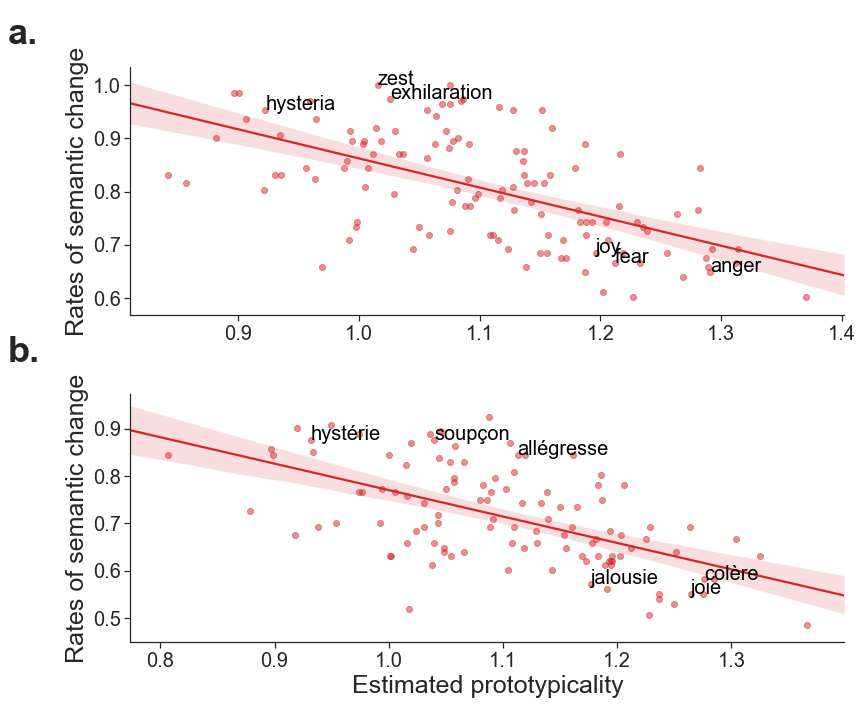

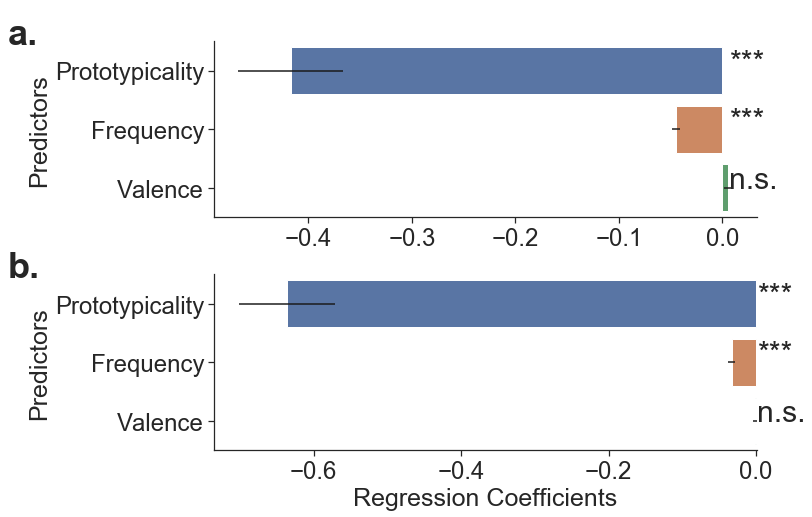

In [5]:
### Anlyses of emotion concepts ###

# illustrations using simple linear regression
change_to_use = 'change' 

# multiple regression to compare predictors
formula = change_to_use + ' ~ ' + ' + '.join(['proto', 'freqs', 'valence',])
model = smf.ols(formula, data=X_eng_emotion)
results_eng = model.fit()
print(results_eng.summary())

# same analysis for French
formula = change_to_use + ' ~ ' + ' + '.join(['proto', 'freqs', 'valence',])
model = smf.ols(formula, data=X_fra_emotion)
results_fra = model.fit()
print(results_fra.summary())

# create plots
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 10))
xlabel = 'Estimated prototypicality'
ylabel = 'Rates of semantic change'

x = X_eng_emotion['proto']
y = X_eng_emotion[change_to_use]
r, p = pearsonr(x, y)
print("Correlation between prototypicality and change (English): r={:.3f}, p={:.3f}".format(r, p))
axes[0] = plot_line_of_best_fit(axes[0], x, y, xlabel, ylabel, 'tab:red')
axes[0] = annotate_scatter(axes[0], eng_examples, eng_emotion_words, x, y)

x = X_fra_emotion['proto']
y = X_fra_emotion[change_to_use]
r, p = pearsonr(x, y)
print("Correlation between prototypicality and change (French): r={:.3f}, p={:.3f}".format(r, p))
axes[1] = plot_line_of_best_fit(axes[1], x, y, xlabel, ylabel, 'tab:red')
axes[1] = annotate_scatter(axes[1], fra_examples, fra_emotion_words, x, y)

axes[0].set_xlabel('')
axes[0].annotate('a.',
            xy=(-0.15, 0.95), xytext=(-0.1, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[1].annotate('b.',
            xy=(-0.15, 0.5), xytext=(-0.1, 0.5),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure3.'+img_format, format=img_format, bbox_inches='tight')


fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 7.42))
ax = axes[0]
ax = plot_coefficents(ax, results_eng, ['Prototypicality', 'Frequency', 'Valence',])
ax.set_ylabel('Predictors', fontsize=25)
ax.set_xlabel('')
ax = axes[1]
ax = plot_coefficents(ax, results_fra, ['Prototypicality', 'Frequency', 'Valence'])
ax.set_ylabel('Predictors', fontsize=25)
ax.set_xlabel('Regression Coefficients', fontsize=25)

axes[0].annotate('b.',
            xy=(-0.35, 0.48), xytext=(-0.2, 0.48),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[0].annotate('a.',
            xy=(-0.35, 0.93), xytext=(-0.2, 0.93),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure4.'+img_format, format=img_format, bbox_inches='tight')



                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     21.63
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           5.35e-07
Time:                        17:10:34   Log-Likelihood:                 52.194
No. Observations:                  41   AIC:                            -98.39
Df Residuals:                      38   BIC:                            -93.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3441      0.130      2.653      0.0

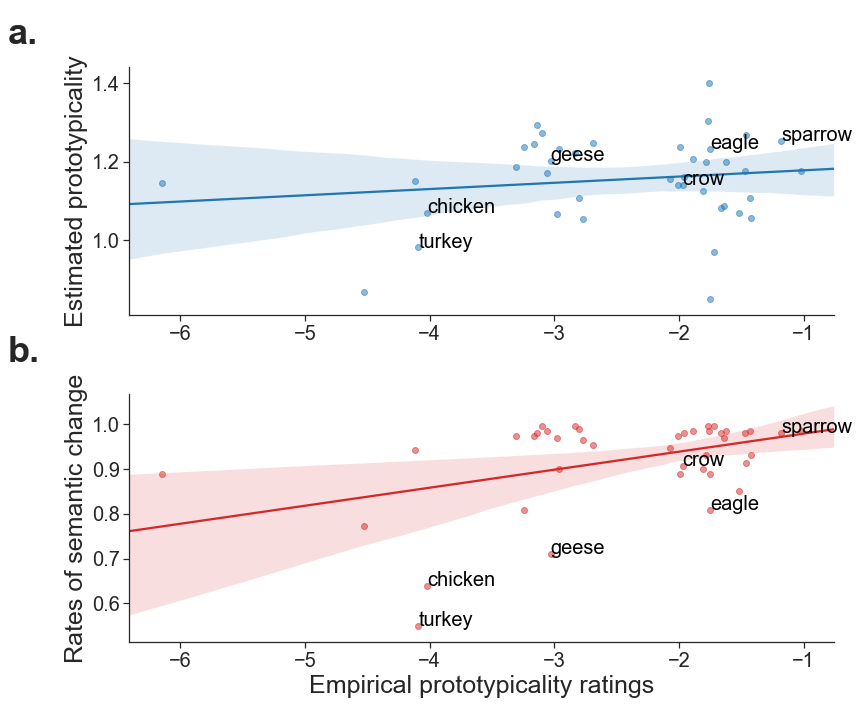

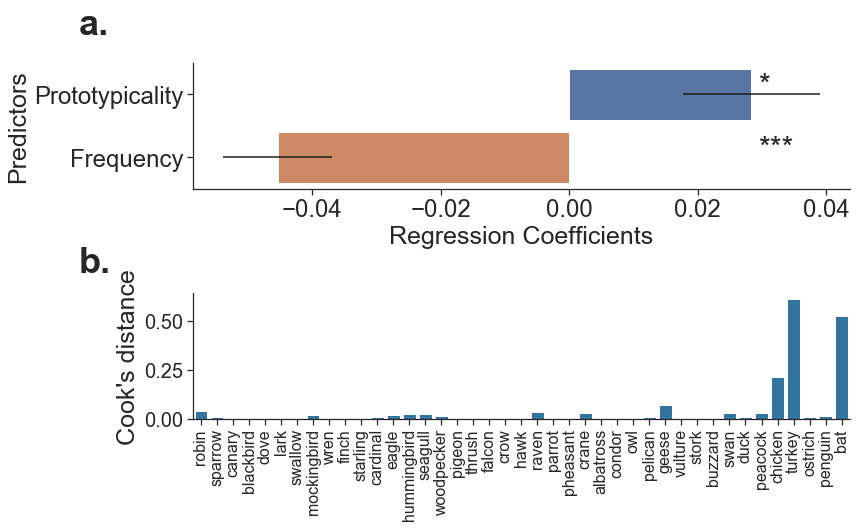

In [6]:
### Anlyses of birds ###
formula = 'change ~ ' + ' + '.join(['proto', 'freqs',])
model = smf.ols(formula, data=X_birds)
results = model.fit()
print(results.summary())

birds_names = list(rosch_changes.keys())

# plots
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 10))

xlabel = 'Empirical prototypicality ratings'
ylabel = 'Estimated prototypicality'
bird_proto_e = prototype_density(birds_names, data, -3)
y = [bird_proto_e[w] for w in birds_names]
x = X_birds['proto']
r, p = pearsonr(x, y)
print("Birds estimated prototypicality r={:.3f}, p={:.3f}, n={:d}".format(r, p, len(birds_names)))
axes[0] = axes[0] = plot_line_of_best_fit(axes[0], x, y, xlabel, ylabel, 'tab:blue')
axes[0] = annotate_scatter(axes[0], example_birds, birds_names, x, y)

xlabel = xlabel
ylabel = 'Rates of semantic change'
x = X_birds['proto']
y = X_birds['change']
r, p = pearsonr(x, y)
print("Correlation between prototypicality and change (Birds): r={:.3f}, p={:.3f}".format(r, p))
axes[1] = plot_line_of_best_fit(axes[1], x, y, xlabel, ylabel, 'tab:red')
axes[1] = annotate_scatter(axes[1], example_birds, birds_names, x, y)

axes[0].set_xlabel('')
axes[0].annotate('a.',
            xy=(-0.15, 0.95), xytext=(-0.1, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[1].annotate('b.',
            xy=(-0.15, 0.5), xytext=(-0.1, 0.5),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure6.'+img_format, format=img_format, bbox_inches='tight')


fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 7.42))
ax = axes[0]
ax = plot_coefficents(ax, results, ['Prototypicality', 'Frequency',], labelsize=25)

infl = results.get_influence()
infl_dict = {X_birds['name'][i]: v for i, v in enumerate(infl.cooks_distance[0])}

X_infl = {
    'name': birds_names,
    'influence': [infl_dict[w] for w in birds_names]
}
ax = axes[1]
ax = sns.barplot(ax=ax, x="name", y="influence", data=X_infl, color='tab:blue', errwidth=5)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20) 
ax.set_ylabel('Cook\'s distance', fontsize=25)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    
axes[0].annotate('a.',
            xy=(-0.15, 0.95), xytext=(-0.1, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[1].annotate('b.',
            xy=(-0.15, 0.5), xytext=(-0.1, 0.5),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
    
sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure7.'+img_format, format=img_format, bbox_inches='tight')



In [7]:
# precompute for illustration
nns_t1 = {
    'awe': set(get_closest_neighbours('awe', NOUN, pos_data, data, t1, k)),
    'disgust': set(get_closest_neighbours('disgust', NOUN, pos_data, data, t1, k))
}
example_changes = {
    'awe': [],
    'disgust': []
}
for t in range(t1+1, 20):
    for w in example_changes:
        set1 = nns_t1[w]
        set2 = set(get_closest_neighbours(w, NOUN, pos_data, data, t, k))
        example_changes[w].append(1 - len(set1 & set2) / len(set1 | set2))



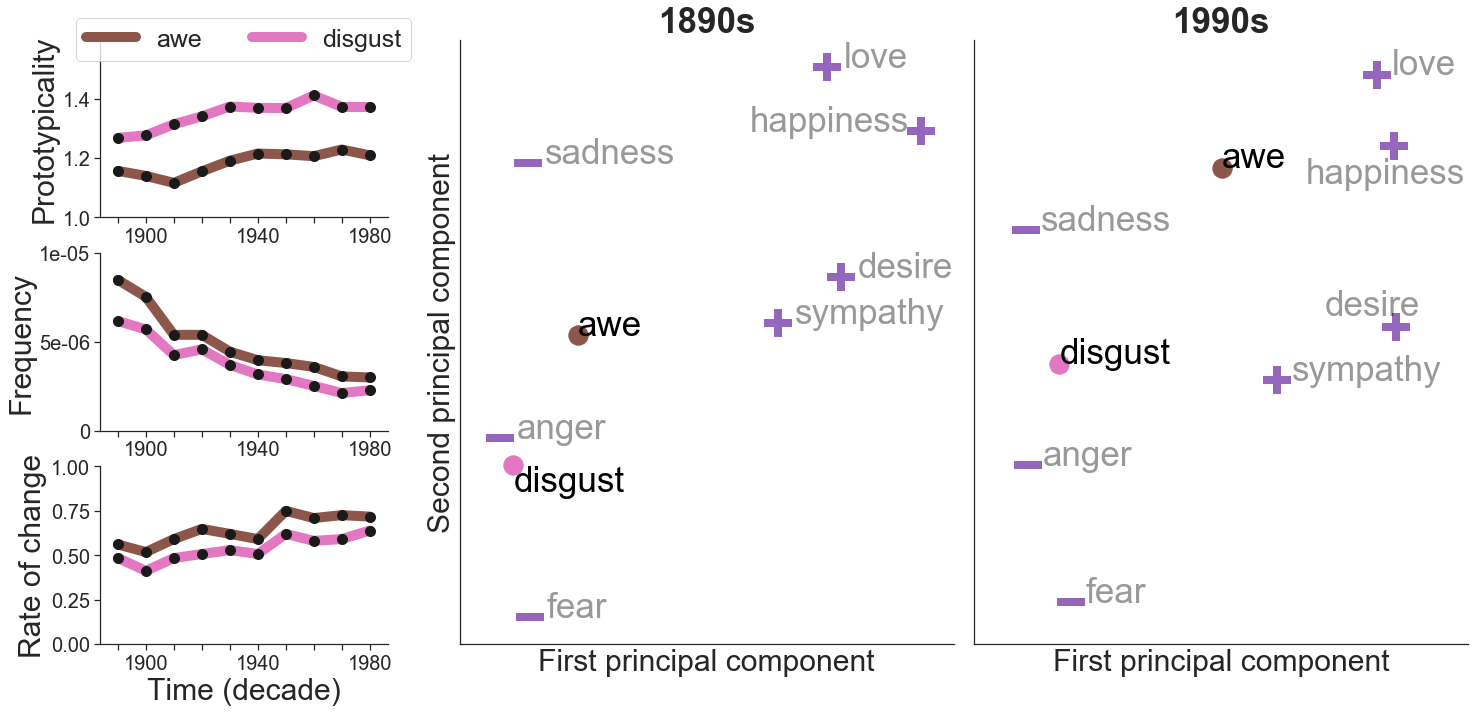

In [8]:
# make illustration plot
fig = plt.figure(constrained_layout=False, figsize=(20, 24))
gs2 = fig.add_gridspec(nrows=3, ncols=1, top=0.35, bottom=0, left=0, right=0.20)
ax5_0 = fig.add_subplot(gs2[0])
ax5 = fig.add_subplot(gs2[1])
ax6 = fig.add_subplot(gs2[2])
gs3 = fig.add_gridspec(nrows=1, ncols=1, top=0.35, bottom=0, left=0.25, right=0.593)
ax7 = fig.add_subplot(gs3[0])
gs4 = fig.add_gridspec(nrows=1, ncols=1, top=0.35, bottom=0, left=0.607, right=0.95)
ax8 = fig.add_subplot(gs4[0])
ax7, ax8 = make_pca_plot([ax7, ax8], emotion_words, data, 9, -1)

# trace reconstructed prototypicality
awe_label = 'awe'
disgust_label = 'disgust'
time_range = list(range(1890, 1990, 10))

vector_proto = {
    'awe': [],
    'disgust': []
}
for t in range(9,19):
    temp = [w for w in words_eng if vectors_filter(w, t, data)]
    temp = prototype_density(temp, data, t)
    vector_proto['awe'].append(temp['awe'])
    vector_proto['disgust'].append(temp['disgust'])

ax5_0.plot(time_range, vector_proto['awe'], linewidth=10, color='tab:brown', label=awe_label, zorder=-1)
ax5_0.plot(time_range, vector_proto['disgust'], linewidth=10, color='tab:pink', label=disgust_label, zorder=-1)
ax5_0.scatter(time_range, vector_proto['awe'], s=100, color='k', zorder=1)
ax5_0.scatter(time_range, vector_proto['disgust'], s=100, color='k', zorder=1)
ax5_0.tick_params(axis='y', labelsize=20)
ax5_0.set_ylabel('Prototypicality', fontsize=30)
ax5_0 = set_x_time_range(ax5_0, time_range)
ax5_0.set_ylim((1., 1.6))
ax5_0.set_yticklabels([1., 1.2, 1.4,], fontsize=20)

ax5_0.legend(prop={'size': 25}, loc="center", ncol=2, bbox_to_anchor=(0.5, 1.))

# trace frequency
ax5.plot(time_range, [freqs_all['awe'][t] for t in time_range], linewidth=10, color='tab:brown', label=awe_label, zorder=-1)
ax5.plot(time_range, [freqs_all['disgust'][t] for t in time_range], linewidth=10, color='tab:pink', label=disgust_label, zorder=-1)
ax5.scatter(time_range, [freqs_all['awe'][t] for t in time_range], s=100, color='k', zorder=1)
ax5.scatter(time_range, [freqs_all['disgust'][t] for t in time_range], s=100, color='k', zorder=1)
ax5.set_ylim((0, 0.00001))
ax5.set_yticklabels([0, 0.000005, 0.00001, 0.000015, 0.00002,], fontsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.set_ylabel('Frequency', fontsize=30)
ax5 = set_x_time_range(ax5, time_range)
#ax5.legend(prop={'size': 25}, loc="center", ncol=2, bbox_to_anchor=(0.5, 1.))

# trace semantic change
ax6.plot(time_range, example_changes['awe'], linewidth=10, color='tab:brown', zorder=-1)
ax6.plot(time_range, example_changes['disgust'], linewidth=10, color='tab:pink', zorder=-1)
ax6.scatter(time_range, example_changes['awe'], s=100, color='k', zorder=1)
ax6.scatter(time_range, example_changes['disgust'], s=100, color='k', zorder=1)
ax6.set_ylim((0, 1))
ax6.tick_params(axis='y', labelsize=20)
ax6.set_ylabel('Rate of change', fontsize=30)
ax6 = set_x_time_range(ax6, time_range)

ax6.set_xlabel('Time (decade)', fontsize=30)

sns.despine()
img_format = 'svg'
plt.savefig('images/figure5.'+img_format, format=img_format, bbox_inches='tight')




In [9]:
# precompute for illustration 2
measures_emotion_eng_late = nn_measure_over_words(words_eng, pos, pos_data, data, -3, t2, k)


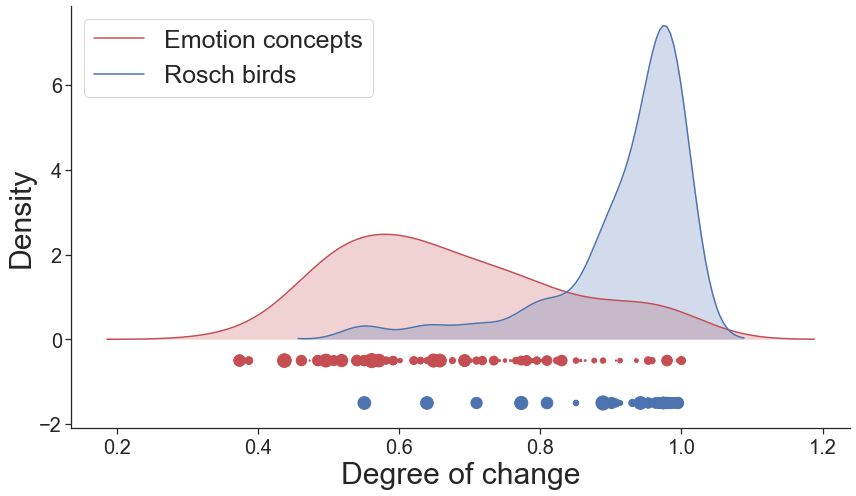

In [10]:
# helper functions
# comparing semantic change in emotion words and bird names
def standardize_proto(x):
    return (x - np.mean(x)) / np.std(x)
 
def normalize_proto(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
    
    
colours = ['r', 'b']
words = list(measures_emotion_eng_late.keys()) 
words2 = list(rosch_changes.keys())
x = np.array([measures_emotion_eng_late[w] for w in words])
x2 = np.array([rosch_changes[w] for w in words2])
p = normalize_proto(np.array([proto[w] for w in words]))
p2 = normalize_proto(np.array([proto_rosch[w] ** -1 for w in words2]))

h = 0.6
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(12, 7))
plot_kde(x, h, p, ax, 'Emotion concepts', colours[0], -0.5)
plot_kde(x2, h, p2, ax, 'Rosch birds', colours[1], -1.5)
ax.legend(prop={'size': 25})
    
sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure8.'+img_format, format=img_format, bbox_inches='tight')




ENG: Pearson between frequency and change r=-0.694123, p-value=0.000000
ENG: Pearson between all-noun and emotion-only r=-0.694123, p-value=0.000000
FRA: Pearson between frequency and change r=-0.372570, p-value=0.000052
FRA: Pearson between all-noun and emotion-only r=-0.372570, p-value=0.000052
                            OLS Regression Results                            
Dep. Variable:           change_bound   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     31.92
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           3.27e-15
Time:                        17:12:24   Log-Likelihood:                 120.17
No. Observations:                 123   AIC:                            -232.3
Df Residuals:                     119   BIC:                            -221.1
Df Model:                           3                                 

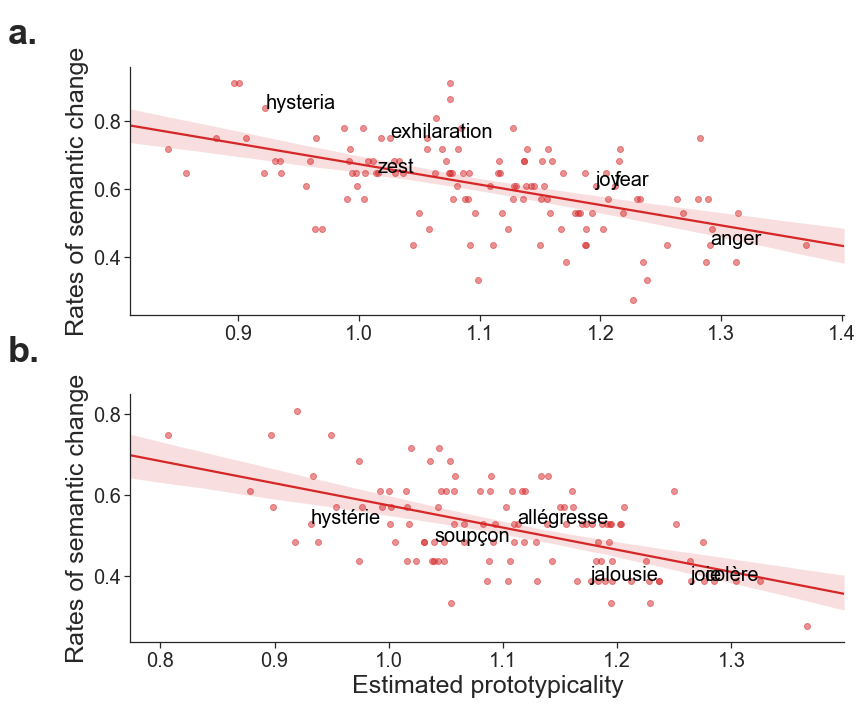

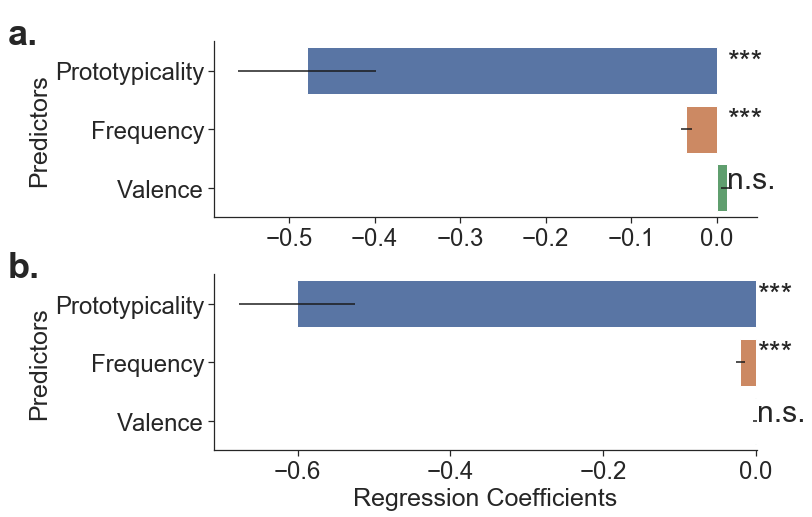

In [11]:
# category bounded analyses
def probing_corrs(lang, freqs, changes, changes2):
    r_freq, p_freq = pearsonr(freqs, changes)
    r_change, p_change = pearsonr(freqs, changes)
    print('%s: Pearson between frequency and change r=%f, p-value=%f' % (lang, r_freq, p_freq))
    print('%s: Pearson between all-noun and emotion-only r=%f, p-value=%f' % (lang, r_change, p_change))

probing_corrs('ENG', X_eng_emotion['freqs'], X_eng_emotion['change'], X_eng_emotion['change_bound'])
probing_corrs('FRA', X_fra_emotion['freqs'], X_fra_emotion['change'], X_fra_emotion['change_bound'])
    
# illustrations using simple linear regression
change_to_use = 'change_bound'

# multiple regression to compare predictors
formula = change_to_use + ' ~ ' + ' + '.join(['proto', 'freqs', 'valence',])
model = smf.ols(formula, data=X_eng_emotion)
results_eng = model.fit()
print(results_eng.summary())

# same analysis for French
formula = change_to_use + ' ~ ' + ' + '.join(['proto', 'freqs', 'valence',])
model = smf.ols(formula, data=X_fra_emotion)
results_fra = model.fit()
print(results_fra.summary())

# create plots
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 10))
xlabel = 'Estimated prototypicality'
ylabel = 'Rates of semantic change'

x = X_eng_emotion['proto']
y = X_eng_emotion[change_to_use]
r, p = pearsonr(x, y)
print("Correlation between prototypicality and change (English): r={:.3f}, p={:.3f}".format(r, p))
axes[0] = plot_line_of_best_fit(axes[0], x, y, xlabel, ylabel, 'tab:red')
axes[0] = annotate_scatter(axes[0], eng_examples, eng_emotion_words, x, y)

x = X_fra_emotion['proto']
y = X_fra_emotion[change_to_use]
r, p = pearsonr(x, y)
print("Correlation between prototypicality and change (French): r={:.3f}, p={:.3f}".format(r, p))
axes[1] = plot_line_of_best_fit(axes[1], x, y, xlabel, ylabel, 'tab:red')
axes[1] = annotate_scatter(axes[1], fra_examples, fra_emotion_words, x, y)

axes[0].set_xlabel('')
axes[0].annotate('a.',
            xy=(-0.15, 0.95), xytext=(-0.1, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[1].annotate('b.',
            xy=(-0.15, 0.5), xytext=(-0.1, 0.5),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/bounded_multiple.'+img_format, format=img_format, bbox_inches='tight')


fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 7.42))
ax = axes[0]
ax = plot_coefficents(ax, results_eng, ['Prototypicality', 'Frequency', 'Valence',])
ax.set_ylabel('Predictors', fontsize=25)
ax.set_xlabel('')
ax = axes[1]
ax = plot_coefficents(ax, results_fra, ['Prototypicality', 'Frequency', 'Valence'])
ax.set_ylabel('Predictors', fontsize=25)
ax.set_xlabel('Regression Coefficients', fontsize=25)

axes[0].annotate('b.',
            xy=(-0.35, 0.48), xytext=(-0.2, 0.48),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[0].annotate('a.',
            xy=(-0.35, 0.93), xytext=(-0.2, 0.93),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/bounded_scatter.'+img_format, format=img_format, bbox_inches='tight')

